# Ford Go-Bike Trip Data Exploration

<br><br>

## Preliminary Wrangling

This document explores a dataset containing ride details consisting around 5 million different rides for 2nd half of year 2017.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import math

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
rides = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(rides.shape)
print(rides.dtypes)
print(rides.head(10))

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6          4507  2017

In [4]:
# more details
print(rides.info())
print(rides.describe())
rides.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB
N

duration_sec                start_time                  end_time  \
364457           720  2017-09-09 12:54:36.5360  2017-09-09 13:06:37.3370   
494325           578  2017-07-20 09:46:24.4120  2017-07-20 09:56:02.8770   
347048           677  2017-09-14 17:37:21.5490  2017-09-14 17:48:39.0660   

        start_station_id                                 start_station_name  \
364457                75                           Market St at Franklin St   
494325                15  San Francisco Ferry Building (Harry Bridges Pl...   
347048               184                             Franklin St at 14th St   

        start_station_latitude  start_station_longitude  end_station_id  \
364457               37.773793              -122.421239              86   
494325               37.795392              -122.394203              50   
347048               37.803765              -122.269988             178   

                           end_station_name  end_station_latitude  \
364457              Market St at Dolores St             37.769305   
494325  2nd St at Townsend St - Coming Soon             37.780526   
347048                  Broadway at 30th St             37.819381   

        end_station_longitude  bike_id   user_type  
364457            -122.426826     2641    Customer  
494325            -122.390288       81  Subscriber  
347048            -122.261928      464  Subscriber

### What is the structure of your dataset?

There are 516988 ride entries in the dataset with 13 different variables as seen above. Most variables are float type and some need to be converted from object to datetime, rest the data is almost clean.<br>


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring ride usage trends according to monthly and weekly distributions.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Type of customers, their behavior in respect to rides and finding out whether they correlate.<br><br>


## Univariate Exploration

I'll start by converting columns datatypes to much more appropriate dtypes and creating seperate date columns from date time.

In [5]:
# Check if any extra months which have very few start or end days recorded
rides.start_time.max(), rides.end_time.max(), rides.start_time.min(), rides.end_time.min()

('2017-12-31 23:59:01.2610',
 '2018-01-01 15:12:50.2450',
 '2017-06-28 09:47:36.3470',
 '2017-06-28 09:52:55.3380')

In [6]:
# Create new appropriate date time columns for easy analysis
rides['start_time']=pd.to_datetime(rides['start_time'])
rides['end_time']=pd.to_datetime(rides['end_time'])
rides['start_date']=rides['start_time'].dt.date
rides['end_date']=rides['end_time'].dt.date
rides['start_month']=rides['start_time'].dt.month.astype(int)
rides['end_month']=rides['end_time'].dt.month.astype(int)
rides['start_day']=rides['start_time'].dt.day.astype(int)
rides['end_day']=rides['end_time'].dt.day.astype(int)
rides['start_day_name']=rides['start_time'].dt.day_name()
rides['end_day_name']=rides['end_time'].dt.day_name()
rides['start_year']=rides['start_time'].dt.year.astype(int)
rides['end_year']=rides['end_time'].dt.year.astype(int)
rides['month']=rides['start_time'].dt.month_name()
rides['week']=rides['start_date'].apply(lambda d: (d.day-1) // 7 + 1)
rides['dow'] = rides['start_time'].dt.dayofweek.astype(int)
rides['duration_min'] = (rides['duration_sec']/60).astype(float)

In [7]:
# Drop those months which did not have all of it's days recorded and check again
rides.drop(rides[rides['end_year'] == 2018].index , inplace=True)
rides.drop(rides[rides['start_month'] == 6].index , inplace=True)

# Drop seperate year columns as it is not needed anymore
rides.drop(['start_year','end_year'], axis=1, inplace=True)

rides.start_time.max(), rides.end_time.max(), rides.start_time.min(), rides.end_time.min()

(Timestamp('2017-12-31 23:41:32.917000'),
 Timestamp('2017-12-31 23:55:21.220000'),
 Timestamp('2017-07-01 00:34:41.256000'),
 Timestamp('2017-07-01 00:37:59.745000'))

In [8]:
# Our final clean data for analysis is ready
rides.sample(3)

duration_sec              start_time                end_time  \
338638          1143 2017-09-17 14:11:47.935 2017-09-17 14:30:51.383   
465721           207 2017-08-03 20:04:44.810 2017-08-03 20:08:12.469   
89487            917 2017-11-30 09:31:34.530 2017-11-30 09:46:51.618   

        start_station_id                   start_station_name  \
338638                50  2nd St at Townsend St - Coming Soon   
465721                76           McCoppin St at Valencia St   
89487                 81                   Berry St at 4th St   

        start_station_latitude  start_station_longitude  end_station_id  \
338638               37.780526              -122.390288               6   
465721               37.771662              -122.422423              59   
89487                37.775880              -122.393170               9   

                     end_station_name  end_station_latitude  ...  start_month  \
338638  The Embarcadero at Sansome St             37.804770  ...            9   
465721    S Van Ness Ave at Market St             37.774814  ...            8   
89487          Broadway at Battery St             37.798572  ...           11   

        end_month start_day end_day start_day_name  end_day_name      month  \
338638          9        17      17         Sunday        Sunday  September   
465721          8         3       3       Thursday      Thursday     August   
89487          11        30      30       Thursday      Thursday   November   

        week  dow duration_min  
338638     3    6    19.050000  
465721     1    3     3.450000  
89487      5    3    15.283333  

[3 rows x 25 columns]

In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516988 entries, 23 to 517010
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             516988 non-null  int64         
 1   start_time               516988 non-null  datetime64[ns]
 2   end_time                 516988 non-null  datetime64[ns]
 3   start_station_id         516988 non-null  int64         
 4   start_station_name       516988 non-null  object        
 5   start_station_latitude   516988 non-null  float64       
 6   start_station_longitude  516988 non-null  float64       
 7   end_station_id           516988 non-null  int64         
 8   end_station_name         516988 non-null  object        
 9   end_station_latitude     516988 non-null  float64       
 10  end_station_longitude    516988 non-null  float64       
 11  bike_id                  516988 non-null  int64         
 12  user_type      

### Q1) Whether ride count in the given dataset is in increasing or decreasing order?

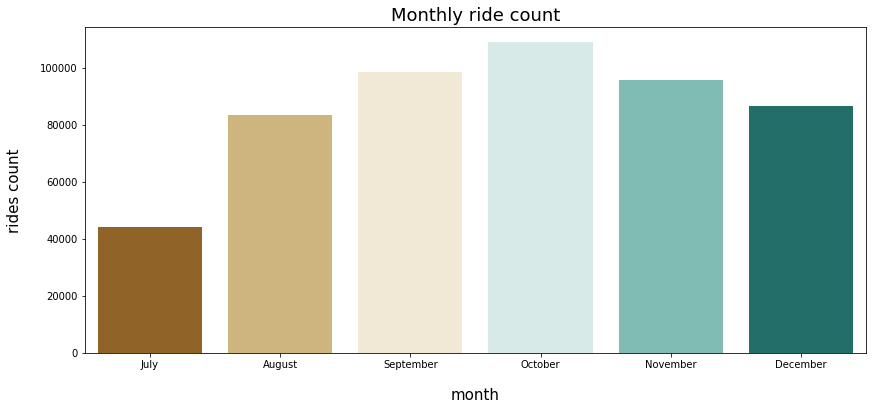

In [10]:
plt.figure(figsize=(14,6))
sb.countplot(x='month', palette="BrBG", data=rides.sort_values(by='start_month'))
plt.title('Monthly ride count', fontsize=18)
plt.xlabel('month', labelpad=18, fontsize=15)
plt.ylabel('rides count', labelpad=18, fontsize=15)
ax = plt.gca()
plt.savefig('Q1.png')

**As observed above, there was a huge bump in rides since August and a slow decrease is to be seen since November.<br> Hence, the reason for this may be the season but the exact cause couldnt be assessed just by 6 months data.<br> Therefore, to conclude upon the given data, Yes, rides count has increased since July.**

### Q2) Does daily traffic differ from weekday to weekend?

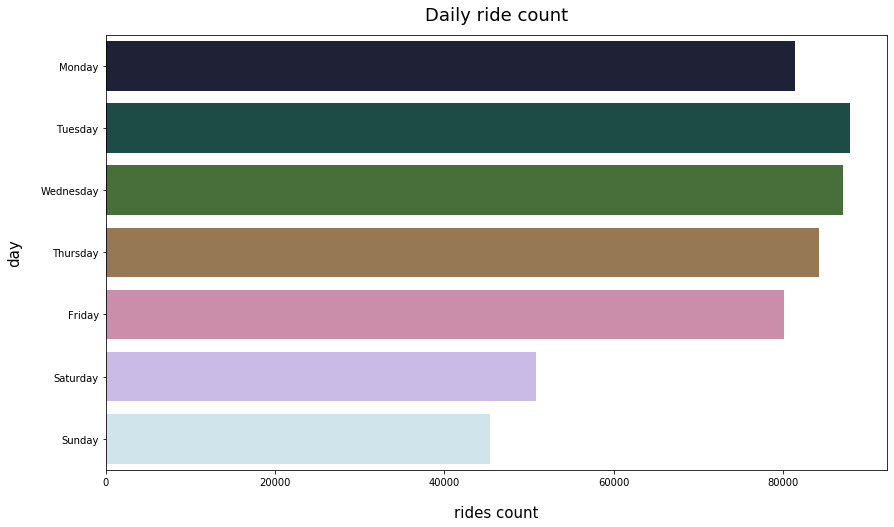

In [11]:
plt.figure(figsize=(14,8))
sb.countplot(y='start_day_name', palette='cubehelix', data=rides.sort_values(by='dow'), orient='h')
plt.title('Daily ride count', fontsize=18, y=1.02)
plt.xlabel('rides count', labelpad=18, fontsize=15)
plt.ylabel('day', labelpad=18, fontsize=15)
ax = plt.gca()
plt.savefig('Q2.png')

**As observed above, we can conclude that weekdays have much higher traffic than weekends mostly because of workdays.**

## Bivariate Exploration

<br>

### Q3) Does ride count of subscribers and customers differ?



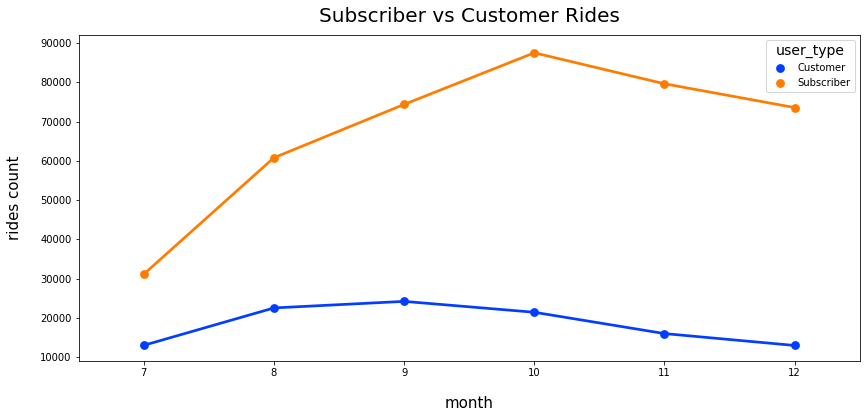

In [12]:
plt.figure(figsize=(14,6))
ax = sb.pointplot(x='start_month', y=0, hue='user_type', palette='bright', data=rides.groupby(["start_month", "user_type"]).size().reset_index())
plt.title('Subscriber vs Customer Rides', fontsize=20, y=1.02)
plt.xlabel('month', labelpad=18, fontsize=15)
plt.ylabel('rides count', labelpad=18, fontsize=15)
leg = ax.legend()
leg.set_title('user_type',prop={'size':14})
ax = plt.gca()
plt.savefig('Q3.png')

**As observed above, customer's ride count is much lower than subscriber's rides count, this maybe because of subscribers are much more in number than customers.<br> Also, customer ride count is somewhat linear throughout the data whereas, subscribers ride count is in an increasing order overall.<br> Therefore, to conclude, subscriber and customer ride count differs alot.**

### Q4) Does the duration of rides differ from customer to subscriber?

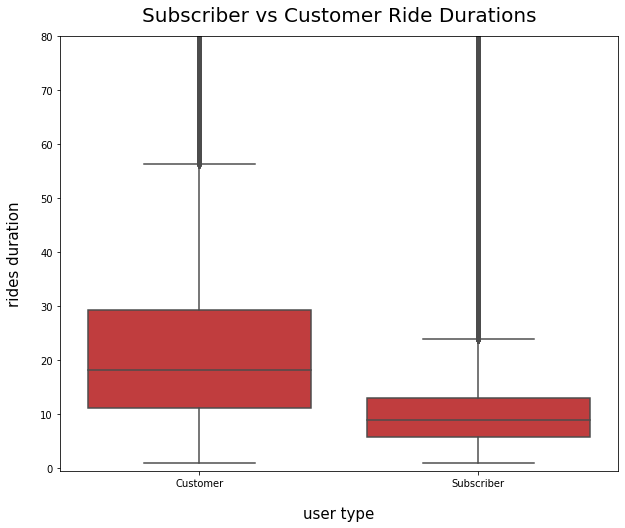

In [13]:
plt.figure(figsize=[10, 8])
mycolor = sb.color_palette()[3]
sb.boxplot(data=rides, x='user_type', y='duration_min', color=mycolor)
plt.ylim([-0.5, 80])
plt.title('Subscriber vs Customer Ride Durations', fontsize=20, y=1.02)
plt.xlabel('user type', labelpad=18, fontsize=15)
plt.ylabel('rides duration', labelpad=18, fontsize=15)
plt.savefig('Q4.png')
plt.show()

**As observed above, even if subscribers rides count is much higher than customer's yet, customers average trip duration is much higher than that of subscribers.<br> To conclude, ride duration of customer is higher than subscriber however, if customer counts was to balanced out with subscriber, the difference in average duration of both types might've reduced.**

## Multivariate Exploration

<br>

Lastly, i want to explore what difference does user type make on both ride duration and daily traffic.

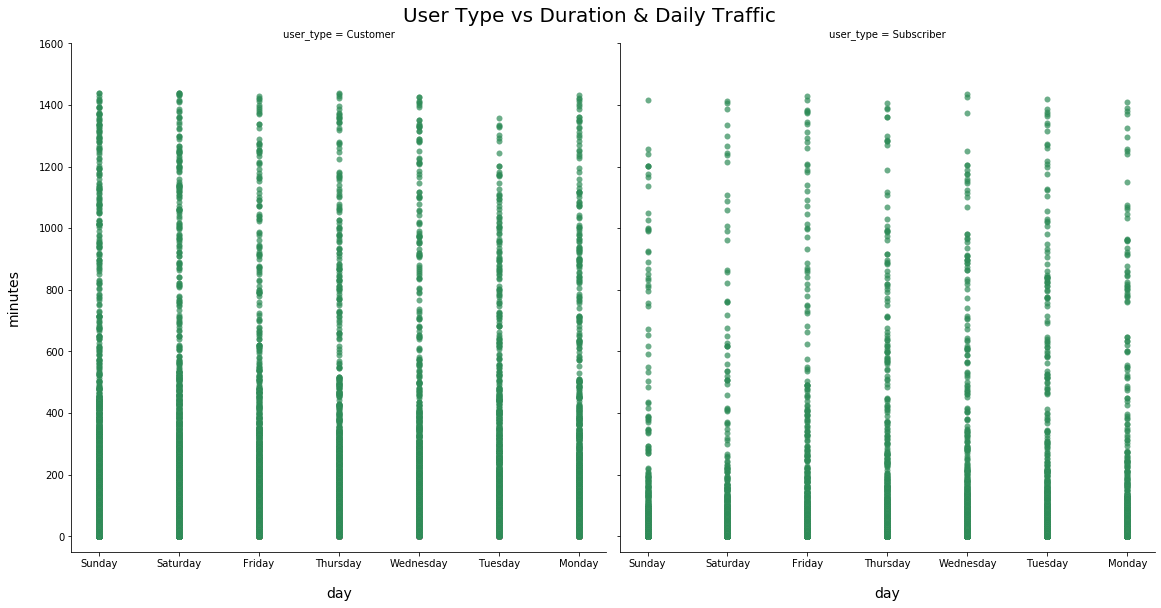

In [14]:
user_type = sb.FacetGrid(data = rides, col = 'user_type', col_wrap = 2, height = 8, ylim = [-50, 1600])
user_type.map(sb.scatterplot, 'start_day_name', 'duration_min', alpha= 0.7, linewidth=0.02, color='seagreen')
user_type.set_xlabels('day', labelpad=18, fontsize=14)
user_type.set_ylabels('minutes', labelpad=18, fontsize=14)
user_type.fig.suptitle('User Type vs Duration & Daily Traffic', y=1.02, fontsize=20)
plt.savefig('Q5.png')
plt.show()

**As observed above, duration for customers is generally higher than subscribers but we now can also point out that customers ride duration is slightly higher on weekends than weekdays while for subscribers it's quite the opposite.<br> Therefore to conclude, we can find more customers on weekends than usual while subscribers are almost the same throughout the week and slightly more on weekdays.**

In [15]:
# Save the cleaned dataframe
rides.to_csv('final_2017-fordgobike-tripdata.csv')